In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [3]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Converting string values into ints

In [7]:
# Converting hotel types from str to int

df.hotel = df.hotel.replace(['City Hotel', 'Resort Hotel'], [0, 1])

In [8]:
# Converting month from str to int

mo = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(mo)

In [9]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [10]:
df['weekday'] = df['date'].dt.weekday

In [11]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
# Converting meal from str to int

meal = {'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4}
df.meal = df.meal.map(meal)

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [13]:
# Converting country from str to int

# First remove nan from list

land = df.country.unique()
check = [not pd.isnull(country) for country in land]
land = land[check]
land = np.sort(land)

land

array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
       'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
       'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 

In [14]:
# Now create a dictionary named "lan" to replace the country names with numbers

lan = {}
i = 0
for l in land:
    i += 1
    lan[l] = i

# Replacing:

df.country = df.country.map(lan)

df.country.unique()

array([136.,  60., 170.,  52.,  77.,  57.,  nan, 140., 125., 128.,   7.,
       134.,  44.,  16.,  30.,  35.,  67.,  82., 124.,  47., 141., 155.,
        12.,  53.,  43.,  26.,  55., 114.,  28., 101., 154.,   4.,  76.,
        32., 108., 104., 167., 149., 102., 135., 150.,  31.,  13.,  24.,
       100., 163., 175.,   2.,  81.,  41., 176.,  38., 177.,  49.,  92.,
        39.,  73.,   6., 162.,  83.,  72.,  70.,  78.,  61.,   5.,  64.,
       169.,  84.,  29.,  42.,  36.,  62.,  93., 122., 107., 172., 153.,
        56.,  87., 129.,  74.,  95., 132., 145., 156.,  14.,  21., 127.,
       159.,  48., 109., 118.,   8.,  86.,  99.,  40.,  34.,  23., 116.,
        37., 152., 166.,  20.,  33.,  85., 157., 146.,  15., 143., 174.,
       133., 139.,  51., 131., 111., 117.,  50., 106.,  80., 171., 126.,
        22., 103., 158., 164.,  45., 151.,  91.,  54.,  79.,  71., 142.,
        89., 105.,  19.,  75., 160., 123.,  17., 173., 165.,  59.,  63.,
       161.,  65.,  88.,  98.,  66., 113., 168., 11

In [15]:
# Second convert nan to 0 in country

df.country = df.country.fillna(0)

df.country = df.country.astype(int) # Converting from float to int

df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [16]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [17]:
# Converting market_segment from str to int

market_seg = df.market_segment.unique()

ms = {}
i = 0
for m in market_seg:
    i += 1
    ms[m] = i

# Replacement:

df.market_segment = df.market_segment.map(ms)

df.market_segment.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [18]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [19]:
# Converting distribution_channel from str to int

dc = {'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4}
df.distribution_channel = df.distribution_channel.map(dc)

df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [20]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [21]:
# Converting reserved_room_type from str to int

res_room = np.sort(df.reserved_room_type.unique()) # values are being sorted and then assigned 

rrt = {}
i = 0
for r in res_room:
    i += 1
    rrt[r] = i

# Replacement: 

df.reserved_room_type = df.reserved_room_type.map(rrt)

df.reserved_room_type.unique()

array([ 3,  1,  4,  5,  7,  6,  8,  9, 10,  2], dtype=int64)

In [22]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [23]:
# Converting assigned_room_type from str to int

ass_room = np.sort(df.assigned_room_type.unique()) # values are being sorted and then assigned 

art = {}
i = 0
for a in ass_room:
    i += 1
    art[a] = i

# Replacement: 

df.assigned_room_type = df.assigned_room_type.map(art)

df.assigned_room_type.unique()

array([ 3,  1,  4,  5,  7,  6,  9,  2,  8, 12, 11, 10], dtype=int64)

In [24]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [25]:
# Converting deposit_type from str to int

deposit = {'No Deposit':0, 'Refundable':1, 'Non Refund':2}
df.deposit_type = df.deposit_type.map(deposit)

df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [26]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

In [27]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [28]:
# Converting customer_type from str to int

customer = {'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4}
df.customer_type = df.customer_type.map(customer)

df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [29]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [30]:
# Converting reservation_status from str to int

res_stat = {'No-Show':0, 'Check-Out':1, 'Canceled':2}
df.reservation_status = df.reservation_status.map(res_stat)

df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

<AxesSubplot:>

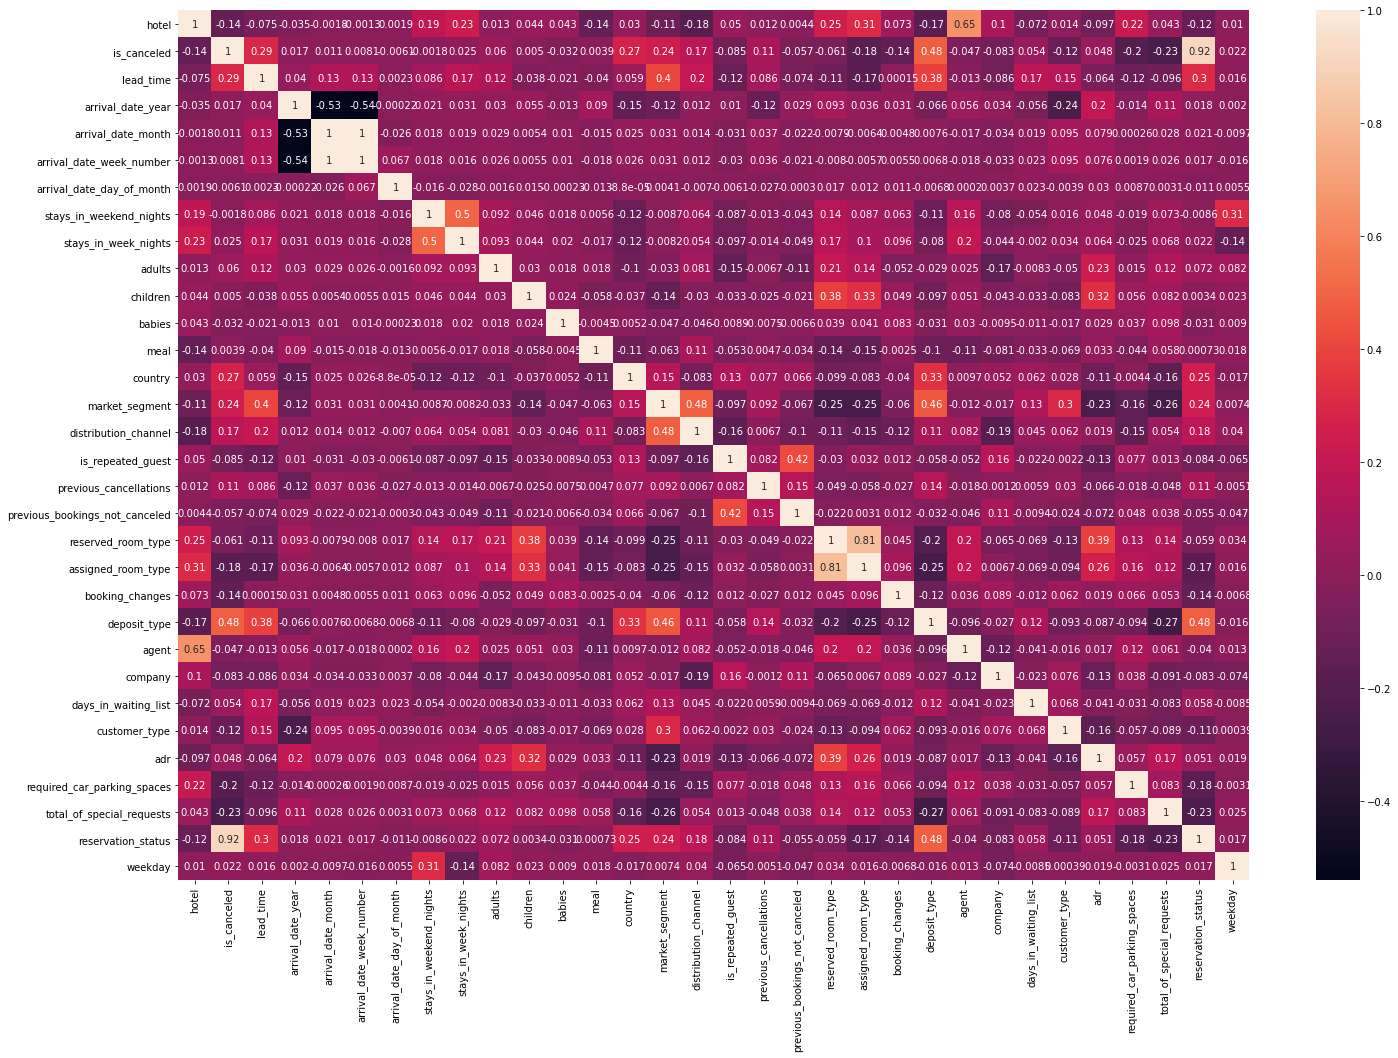

In [31]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [33]:
# Separation of the 2 hotel types for a more detailed observation

df_city_hotel = df[df.hotel == 0]
df_resort_hotel = df[df.hotel == 1]

<AxesSubplot:>

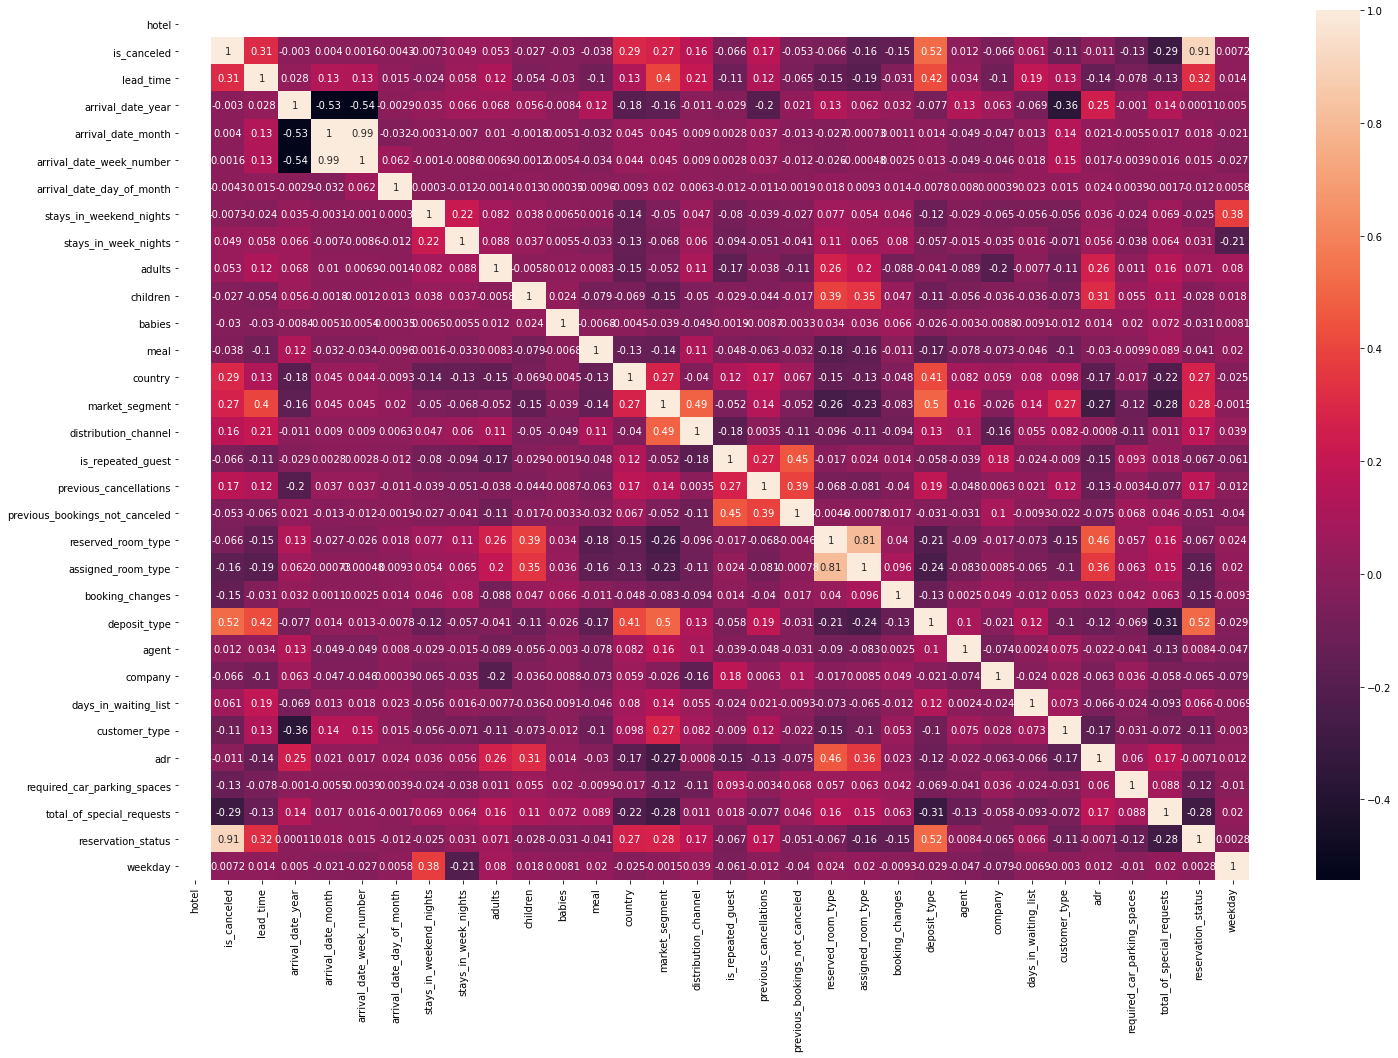

In [34]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_city_hotel.corr(), annot=True, ax = ax)

<AxesSubplot:>

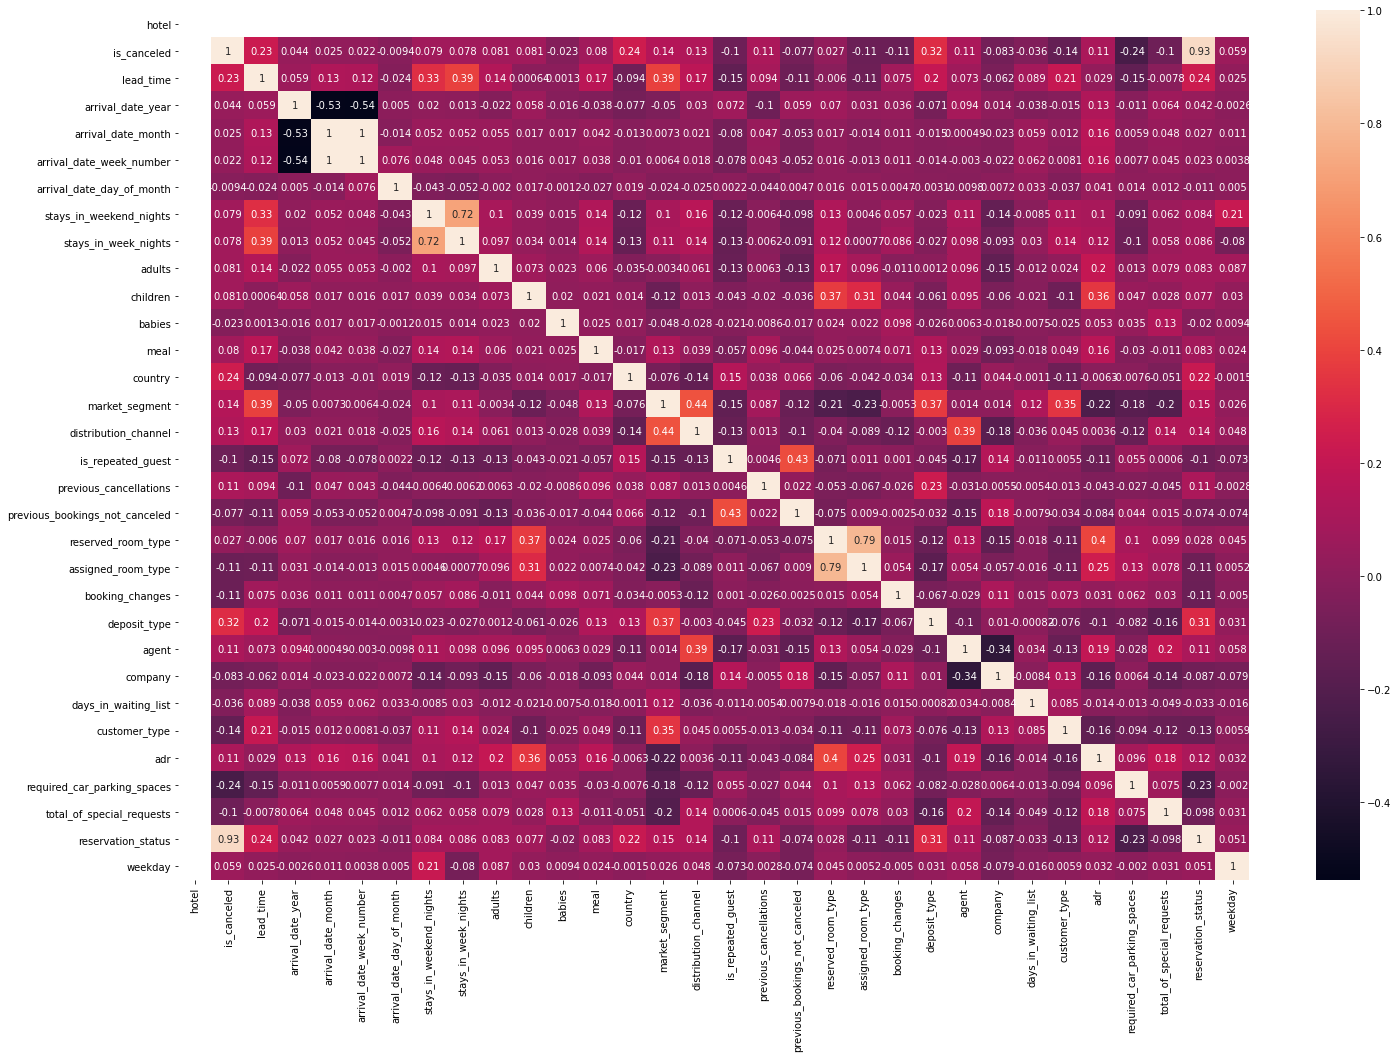

In [35]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_resort_hotel.corr(), annot=True, ax = ax)


In [34]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [36]:
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [37]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

In [39]:
# Decision Tree
DV_model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
DV_model_dt_prediction = DV_model_dt.predict(X_test)
DV_version_dt = accuracy_score(y_test, DV_model_dt_prediction)
DV_version_dt

0.8568975626099339

In [40]:
kappa_DV_dt = cohen_kappa_score(y_test, DV_model_dt_prediction)
kappa_DV_dt

0.6942905953986735

Feature: 0, Score: 0.00290
Feature: 1, Score: 0.11148
Feature: 2, Score: 0.02450
Feature: 3, Score: 0.01086
Feature: 4, Score: 0.04330
Feature: 5, Score: 0.04716
Feature: 6, Score: 0.01556
Feature: 7, Score: 0.02736
Feature: 8, Score: 0.00852
Feature: 9, Score: 0.00453
Feature: 10, Score: 0.00093
Feature: 11, Score: 0.00992
Feature: 12, Score: 0.07554
Feature: 13, Score: 0.07151
Feature: 14, Score: 0.00418
Feature: 15, Score: 0.00056
Feature: 16, Score: 0.02320
Feature: 17, Score: 0.00591
Feature: 18, Score: 0.01023
Feature: 19, Score: 0.01322
Feature: 20, Score: 0.01458
Feature: 21, Score: 0.23404
Feature: 22, Score: 0.06050
Feature: 23, Score: 0.00294
Feature: 24, Score: 0.00191
Feature: 25, Score: 0.01663
Feature: 26, Score: 0.06474
Feature: 27, Score: 0.02363
Feature: 28, Score: 0.04450
Feature: 29, Score: 0.02517


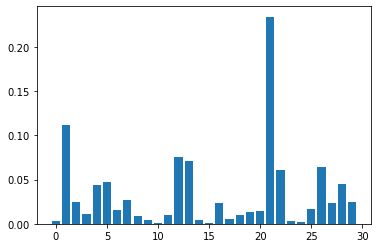

In [42]:
#Feature Importance

# get importance

importance = DV_model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [66]:
# Most important features:

print('Most important features:')
print('1.', X.iloc[:,21].head(1))
print('2.', X.iloc[:,1].head(1))
print('3.', X.iloc[:,12].head(1))

Most important features:
1. 0    0
Name: deposit_type, dtype: int64
2. 0    342
Name: lead_time, dtype: int64
3. 0    136
Name: country, dtype: int32


Maximum:  0.9581239530988275
Mean:  0.8157504103290502


<AxesSubplot:>

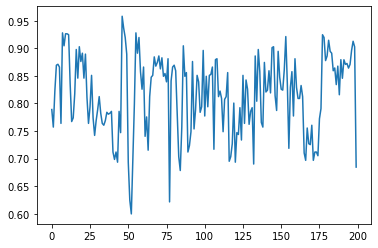

In [67]:
# K-Fold DecisionTree
dt_plot_DV = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', dt_plot_DV.max())
print('Mean: ', dt_plot_DV.mean())
dt_plot_DV = pd.Series(dt_plot_DV)
dt_plot_DV.plot()

In [69]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.8338219281346847

In [70]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6410150707366751

In [443]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8955942708769579

In [444]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.7724079417343939

In [ ]:
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()